<a href="https://colab.research.google.com/github/derzhavin3016/CompMath/blob/master/Lab9/Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя лабораторная работа №9 по вычислительной математике

Державин Андрей, Б01-909

## Задача XI.9.5

Для численного отыскания периодического с периодом $1$ решения уравнения
$$
y'' - P^2(x)y = f(x), \: x\in \left[ 0, 1 \right]
$$
где
$$
P^2(x) =  10 + \sin{2\pi x}, \:\:\:
f(x) = \cos{2\pi x}, \:\:\:
h = 0.005, \: \: Nh = 1
$$
используется разностная схема
$$
\left\lbrace
\begin{matrix}
\dfrac{y_1 - 2y_0 + y_{N-1}}{h^2} - P^2(0)y_0 &=& f(0)& \\
\dfrac{y_{n+1} - 2y_n + y_{n-1}}{h^2} - P^2(nh)y_n &=& f(nh)&, \: n = 1,2, \dots, N-2 \\
\dfrac{y_0 - 2y_{N-1} + y_{N-2}}{h^2} - P^2(1-h)y_{N-1} &=& f(1-h)& \\
\end{matrix}
\right.
$$
где $y_0 = y_N$


### Описание метода

Перепишем систему:
$$
\left\lbrace
\begin{matrix}
y_1 - 2y_0 + y_{N-1} - P^2(0)y_0h^2 &=& f(0)h^2& \\
y_{n+1} - 2y_n + y_{n-1} - P^2(nh)y_nh^2 &=& f(nh)h^2&, \: n = 1,2, \dots, N-2 \\
y_0 - 2y_{N-1} + y_{N-2} - P^2(1-h)y_{N-1}h^2 &=& f(1-h)h^2& \\
\end{matrix}
\right. \Leftrightarrow
$$
$$
\left\lbrace
\begin{matrix}
y_{N-1} - \left(2 + P^2(0)h^2\right)y_0 + y_{1} &=& f(0)h^2& \\
y_{n-1} - \left(2 + P^2(nh)h^2\right)y_n + y_{n+1} &=& f(nh)h^2&, \: n = 1,2, \dots, N-2 \\
y_{N-2} - \left(2 + P^2(1-h)h^2\right)y_{N-1} + y_0 &=& f(1-h)h^2& \\
\end{matrix}
\right. \Leftrightarrow
$$
Введём обозначения
$$
b_k = 2 + P^2(kh)h^2, \:
\varphi_k = f_kh^2
$$
Тогда система запишется в виде
$$
\left\lbrace
\begin{matrix}
y_{N-1} - b_0y_0 + y_{1} &=& \varphi_0& \\
y_{n-1} - b_ny_n + y_{n+1} &=& \varphi_n&, \: n = 1,2, \dots, N-2 \\
y_{N-2} - b_{N-1}y_{N-1} + y_0 &=& \varphi_{N-1}& \\
\end{matrix}
\right.
$$
Имеем рекуррентное соотношение (Абрамов, Андреев):
$$
y_{n-1} = \alpha_n y_n + \beta_n + \gamma_n y_{N-1}
$$
Из первого уравнения получаем для $y_0$:
$$
y_0 = \dfrac{1}{b_0} y_1 - \dfrac{\varphi_0}{b_0} + \dfrac{1}{b_0}y_{N-1}
⇔
\left[
\begin{matrix}
\alpha_1 = \dfrac{1}{b_0}\\
\beta_1 = - \dfrac{\varphi_0}{b_0} \\
\gamma_1 = \dfrac{1}{b_0} 
\end{matrix}
\right] \Leftrightarrow
y_0 = \alpha_1 y_1 + \beta_1 + \gamma_1y_{N-1}
$$

Имеем рекуррентную зависимость для коэффициентов:
$$
\left\lbrace
\begin{matrix}
\alpha_{i+1} &=& \dfrac{1}{b_i - \alpha_i}\\
\beta_{i+1} &=& \dfrac{\beta_i - \varphi_i}{b_i - \alpha_i}\\
\gamma_{i+1} &=& \dfrac{\gamma_i}{b_i - \alpha_i}\\
\end{matrix}
\right. , \: i = \overline{1 \dots N - 2}
$$
Подставляя прогоночные соотношения в последнее уравнение системы, получаем:
$$
  \alpha_{N-1}y_{N-1} + \beta_{N-1} + \gamma_{N-1}y_{N-1} - b_{N-1}y_{N-1} + y_0 = \varphi_{N-1} \Leftrightarrow
$$
$$
y_{N-1} = \mu_{N-1}y_0 + \nu_{N-1}
$$
где
$$
\mu_{N-1} = -\dfrac{1}{\alpha_{N-1} + \gamma_{N-1} - b_{N-1}}
$$
$$
\nu_{N-1} = \dfrac{\varphi_{N-1} - \beta_{N-1}}{\alpha_{N-1} + \gamma_{N-1} - b_{N-1}}
$$
Подставив в прогоночные соотношения $y_n = \mu_n y_0 + \nu_n$:
$$
y_{n-1} = \alpha_n\left( \mu_n y_0 + \nu_n \right) + \beta_n + 
\gamma_n \left( 
  \mu_{N-1} y_0 + \nu_{N-1}
  \right)
$$
Перегруппировав, получаем рекуррентные соотношения:
$$
\mu_{n-1} = \alpha_n \mu_n + \gamma_n \mu_{N-1}
$$
$$
\nu_{n-1} = \beta_n + \alpha_n \nu_n + \gamma_n \nu_{N-1}
$$
Откуда
$$
y_0 = \mu_0 y_0 + \nu_0 \Leftrightarrow 
y_0 \left( 1 - \mu_0 \right) = \nu_0 \Leftrightarrow
y_0 = \dfrac{\nu_0}{1 - \mu_0}
$$
Теперь можно найти $y_{N-1}$, после чего воспользоваться прогоночными соотношениями для получения всех сеточных значений

### Реализация

Импорт нужных библиотек

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Функция прогонки - принимает матрицу и столбец, выполняет прогонку и возваращет массив решений

In [ ]:
def prog(m, ph):
  # forward
  a = m[0][-1]
  b = -m[0][0]
  c = m[0][1]

  alpha = [c / b]
  beta = [-ph[0] / b]
  gamma = [a / b]

  for i in range(1, len(ph) - 1):
    c = m[i][i + 1]
    b = -m[i][i]
    a = m[i][i - 1]

    den = b - alpha[-1] * a

    alpha.append(c / den)
    beta.append((a * beta[-1] - ph[i]) / den)
    gamma.append(a * gamma[-1] / den)

  # backward
  den_mu = m[-1][-2] * (alpha[-1] + gamma[-1]) + m[-1][-1]
  mu = [-m[-1][0] / den_mu]
  nu = [(ph[-1] - m[-1][-2] * beta[-1]) / den_mu]

  for i in reversed(range(0, len(ph) - 1)):
    mu.append(alpha[i] * mu[-1] + gamma[i] * mu[0])
    nu.append(beta[i] + alpha[i] * nu[-1] + gamma[i] * nu[0])

  mu.reverse()
  nu.reverse()
  y_0 = nu[0] / (1 - mu[0])
  y = [mu[-1] * y_0 + nu[-1]]

  # last
  for i in reversed(range(1, len(ph) - 1)):
    y.append(alpha[i] * y[-1] + beta[i] + gamma[i] * y[0])

  y.append(y_0)
  y.reverse()
  return np.array(y)

Вычисление + сравнение результата с numpy

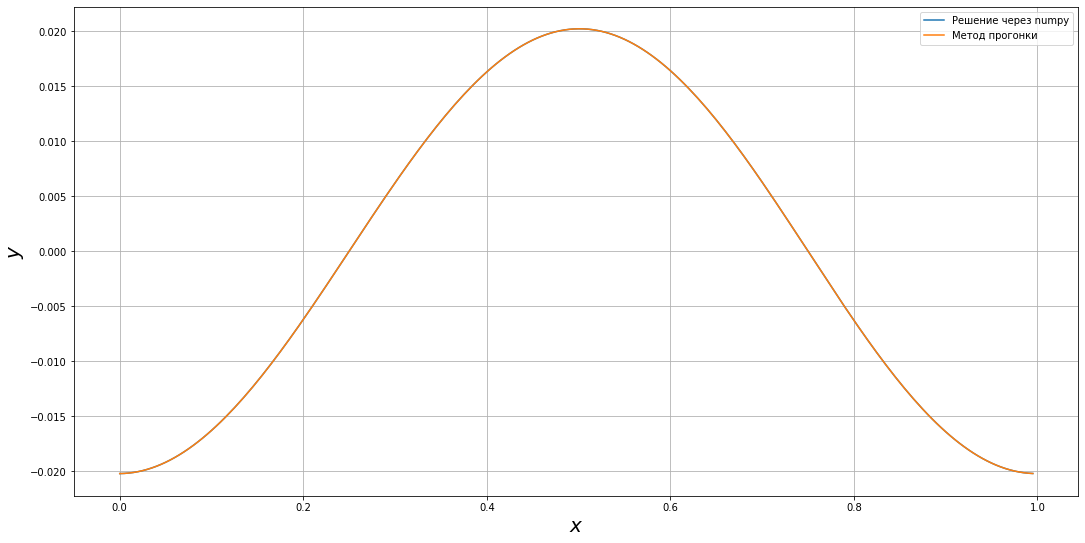

In [ ]:
h = 0.005
N =  int(1 / h)
x = np.array([k * h for k in range(N)])
bs = -(2 + h**2 * (10 + np.sin(2 * np.pi * x)))
phi_col = h**2 * np.cos(2 * np.pi * x)  

mat = np.diag(bs) + np.diag(np.ones(N - 1), 1) + np.diag(np.ones(N - 1), -1)
mat[0][-1] = mat[-1][0] = 1

y = np.linalg.solve(mat, phi_col)
my_y = prog(mat, phi_col)

plt.figure(figsize=(18, 9))
plt.plot(x, y, label="Решение через numpy")
plt.plot(x, my_y, label="Метод прогонки")
plt.xlabel("$x$", fontsize=20)
plt.ylabel("$y$", fontsize=20)
plt.grid()
plt.legend()

Оценка разницы с numpy

In [ ]:
print(f"Отличие решений: {np.mean(abs(y - my_y))}")

Отличие решений: 2.0722759827975652e-16
